<a href="https://colab.research.google.com/github/ShivinM-17/Tensorflow_practises/blob/main/Transfer_learning_finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer learning - Fine tuning type

In [1]:
# Checking if the GPU is connected or not
!nvidia-smi

Tue Jul 11 17:25:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Creating helping functions
Rewriting the functions for plotting, creating models, etc.

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-07-11 17:25:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-11 17:25:03 (119 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
# Import helper functions, we'll be using here
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

**Note:-**When running this notebook, it is to be noted that functions should already be present in the package, and this is needed to be downloaded again and again, if access is required

### Getting the data
We'll be using the pre-trained models under tf.keras.applications

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2023-07-11 17:25:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  23.3MB/s    in 8.1s    

2023-07-11 17:25:15 (19.8 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [6]:
# Creating training and testing directory paths
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [7]:
import tensorflow as tf
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                      image_size = IMG_SIZE,
                                                                      label_mode = "categorical",
                                                                      batch_size = BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
train_data_10_percent

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [9]:
# Checking out the class names of the dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [10]:
# Displaying an example of a batch od data
for image, labels in train_data_10_percent.take(1):
  print(image, labels)

tf.Tensor(
[[[[3.00000000e+00 3.00000000e+00 3.00000000e+00]
   [3.00000000e+00 3.00000000e+00 3.00000000e+00]
   [3.00000000e+00 3.00000000e+00 3.00000000e+00]
   ...
   [1.08642792e+02 6.29234123e+01 3.97091484e+01]
   [1.09000000e+02 6.40000000e+01 4.31428833e+01]
   [1.04571358e+02 6.15713577e+01 4.45713577e+01]]

  [[1.92857146e+00 1.92857146e+00 1.92857146e+00]
   [1.92857146e+00 1.92857146e+00 1.92857146e+00]
   [1.92857146e+00 1.92857146e+00 1.92857146e+00]
   ...
   [1.09499954e+02 6.42703857e+01 4.14285507e+01]
   [1.06780586e+02 6.37805862e+01 4.50612221e+01]
   [1.00714180e+02 5.76886673e+01 4.17652054e+01]]

  [[2.14285851e-01 2.14285851e-01 2.14285851e-01]
   [2.14285851e-01 2.14285851e-01 2.14285851e-01]
   [2.14285851e-01 2.14285851e-01 2.14285851e-01]
   ...
   [1.11045891e+02 6.59540634e+01 4.49999771e+01]
   [1.04943825e+02 6.19438286e+01 4.50152702e+01]
   [9.55713272e+01 5.32805023e+01 3.90815430e+01]]

  ...

  [[9.20765305e+01 5.70765343e+01 3.55051231e+01]
   [9

### Building a transfer learning model using Keras Functional API
The sequential API is straight-forward, it runs our layers in sequential order.

But thr functional API gives us more flexibility with the models

In [11]:
# Create the model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
# top_layer is like the output layer, so since the EfficientNetB0 model is trained on ImageNet,
# which consists of 1000 classes, therfore it's top ocnsists of 1000 neurons

# Freeze the base_model (so the underlying pre-trained patterns aren't updated during training)
base_model.trainable = False

# Creating inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# If using ResNet50V2, we'll need to normalize the inputs
# This is not required for EfficientNetB0 model. it's built-in.
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# Pass the inputs to the base model
x = base_model(inputs)
print(f"Shape after passing inputs to base model: {x.shape}")

# Average pool the outputs of the base model (aggregate all the most inportant imformation, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# Combine the inputs with the outputs
model0 = tf.keras.Model(inputs, outputs)

# Compile the model
model0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )
# Fit the model and save its history
history1 = model0.fit(train_data_10_percent,
                      epochs=5,
                      steps_per_epoch=len(train_data_10_percent),
                      validation_data=test_data,
                      validation_steps=int(0.25*len(test_data)),
                      callbacks=[create_tensorboard_callback(dir_name = "transfer_learning",
                                                             experiment_name = "model0")])

16705208/16705208 [==============================] - 2s 0us/step


Shape after passing inputs to base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/model0/20230711-172530
Epoch 1/5
24/24 [==============================] - 23s 351ms/step - loss: 1.8571 - accuracy: 0.4293 - val_loss: 1.2491 - val_accuracy: 0.7516
Epoch 2/5
24/24 [==============================] - 5s 167ms/step - loss: 1.0711 - accuracy: 0.7680 - val_loss: 0.8394 - val_accuracy: 0.8224
Epoch 3/5
24/24 [==============================] - 5s 175ms/step - loss: 0.7776 - accuracy: 0.8373 - val_loss: 0.6857 - val_accuracy: 0.8405
Epoch 4/5
24/24 [==============================] - 4s 150ms/step - loss: 0.6227 - accuracy: 0.8667 - val_loss: 0.5515 - val_accuracy: 0.8832
Epoch 5/5
24/24 [==============================] - 5s 153ms/step - loss: 0.5282 - accuracy: 0.8933 - val_loss: 0.5196 - val_accuracy: 0.8717


In [12]:
# Getting the summary of the model
model0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [13]:
# Evaluating the model on test_data
model0.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.5517 - accuracy: 0.8584


[0.5517248511314392, 0.8583999872207642]

In [14]:
# Checking out the layers in the base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [15]:
# Getting the summary of the base_model
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

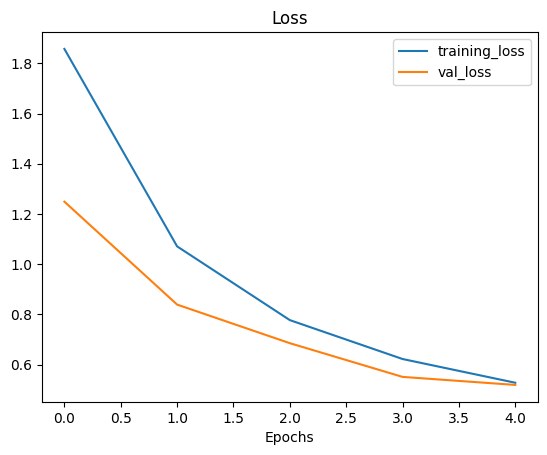

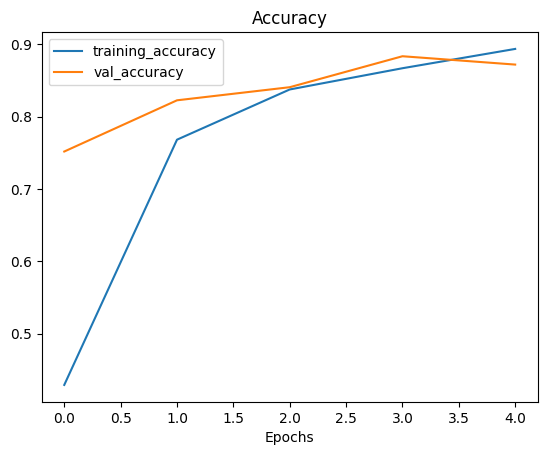

In [16]:
# Checking the model's loss curves
plot_loss_curves(history1)

### Getting a feature vector from a trained model
Demonstrating the Global Average Pooling 2D layer ...                            
We have a tensor after the model goes through 'base_model' of shape (None, 7, 7, 1280).                                
But then when it passes through GlobalAveragePooling2D, it turns into (None, 1280)

For instance, passing shaped tensor of (1,4,4,3) and then pass it to GlobalAveragePooling2D

In [17]:
# Define the input shape
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Passing the tensor througha global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

# Checking the shape of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of Global Average Pooled 2D tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of Global Average Pooled 2D tensor: (1, 3)


In [18]:
# Replicating the GlobalAveragePooling2D layer
tf.reduce_mean(input_tensor, axis=[1,2])

# This GlobalAveragePooling2D methods condenses the tensor into a lower base form

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

A **Feature Vector** is a learned representation of the input data (compressed form of the input data based on how the model see's it)

## Runnning some experiments of transfer learning
Since we've seen the results of transfer learning from only 10% of the training data, we'll now check what happens to the results for 1% of the dataset.

1. **model1** - use feature extraction transfer learning with 1% of the training data with data augmentation
2. **model2** - use feature extraction transfer learning with 10% of the training data with data augmentation
3. **model3** - use fine-tuning transfer learning on 10% of the training data with data augmentation
4. **model4** - use fine-tuning transfer learning on 100% of the training data with data augmentation

**Note:-** Throughout the experiments, the same test dataset will be used to evaluate the model


### Downloading the data

In [19]:
# Download and unzip the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2023-07-11 17:26:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  22.1MB/s    in 7.2s    

2023-07-11 17:26:31 (17.8 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [20]:
# Creating training and testing directories
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [21]:
# Getting number of images in the dataset
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'

Here, we only have 7 images for each class in the dataset for training our model, while having 250 images of each class for the testing set

In [22]:
# Setup the data loader
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical",
                                                                           batch_size=BATCH_SIZE
                                                                           )
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Adding data augmentation right into the model
This can be done using
* `tf.keras.layers.experimental.preprocessing()`

The benefits of using data augmentation inside the models is:
* Preprocessing of images (augmenting them) happens on the GPU, which is much faster rather than the CPU only computation.
* Image data augmentation only happens during training, so we can still export our whole model and use it elsewhere.

**Note:-** When passed as a layer to a model, data augmentation is automatically turned on during training (augments the training data), but turned off during inference (does not augment testing data or new unseen data)

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Creating data augmentation stage with horizontal flipping, rotations, zooms, etc.
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescale(1./255)  # Keep for models like ResNet50V2 but EfficientNetB0 already has it built-in
], name="data_augmentation")


### Visualising the data augmentation layer

10_food_classes_1_percent/train/hamburger 2014421.jpg


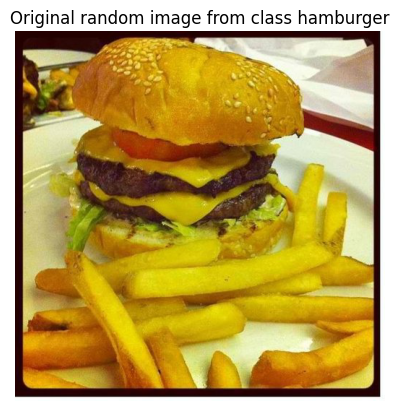

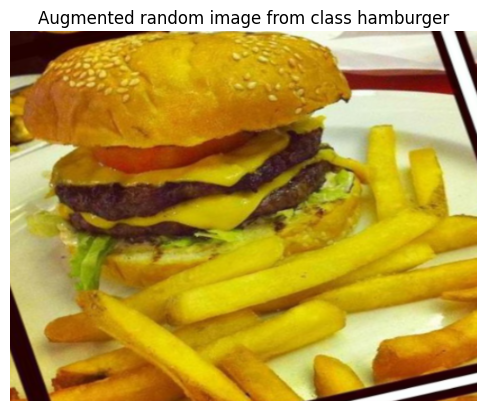

In [24]:
# View a random image and compare it to its augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/"+target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
print(target_dir, random_image)

# Read the random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class {target_class}")
plt.axis(False);

# Now, plotting the augmented random image
augmented_img = data_augmentation(img, training=True)
plt.figure()
plt.imshow(augmented_img/255.)  # Dividing the image, since the values were not normalised
plt.title(f"Augmented random image from class {target_class}")
plt.axis(False);


In [25]:
train_data_1_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

### Model - 1: Feature extraction transfer learning with 1% of the training data






In [26]:
# Setup the input shape and base model, freezing the base model layers
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False   # We want to model to be pre-trained on the ImageNet dataset

# Create input layer
inputs = layers.Input(shape = input_shape, name = "input_layer")

# Add in data augmentation sequential model as a layer
x = data_augmentation(inputs)

# Give base_model the inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of the base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model using the inputs and outputs
model1 = keras.Model(inputs, outputs)

# Compile the model
model1.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model
history2 = model1.fit(train_data_1_percent,
                      epochs=5,
                      steps_per_epoch=len(train_data_1_percent),
                      validation_data=test_data,
                      validation_steps=len(test_data),
                      callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                             experiment_name="model1")])



Saving TensorBoard log files to: transfer_learning/model1/20230711-172636
Epoch 1/5
3/3 [==============================] - 16s 4s/step - loss: 2.4606 - accuracy: 0.0857 - val_loss: 2.1951 - val_accuracy: 0.2160
Epoch 2/5
3/3 [==============================] - 9s 4s/step - loss: 2.1851 - accuracy: 0.1857 - val_loss: 2.0556 - val_accuracy: 0.2924
Epoch 3/5
3/3 [==============================] - 8s 4s/step - loss: 1.9554 - accuracy: 0.3857 - val_loss: 1.9396 - val_accuracy: 0.3648
Epoch 4/5
3/3 [==============================] - 8s 4s/step - loss: 1.7999 - accuracy: 0.4429 - val_loss: 1.8384 - val_accuracy: 0.4368
Epoch 5/5
3/3 [==============================] - 7s 3s/step - loss: 1.6398 - accuracy: 0.6429 - val_loss: 1.7462 - val_accuracy: 0.4980


With only 1% percent of the training data, we are able to get the val_accuracy to about 43%

In [27]:
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, 3)          0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [28]:
# Evaluating the model on the testing data
model1.evaluate(test_data)

79/79 [==============================] - 11s 135ms/step - loss: 1.7462 - accuracy: 0.4980


[1.7462295293807983, 0.49799999594688416]

Even on the whole testing dataset, we get accuracy as 43%, which is reallly good for a model, which has trained on only 7 images per class

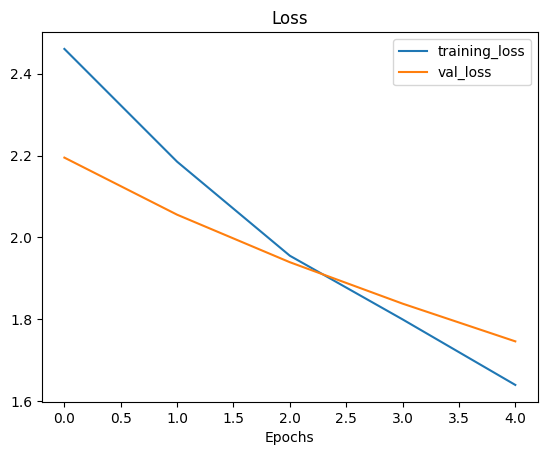

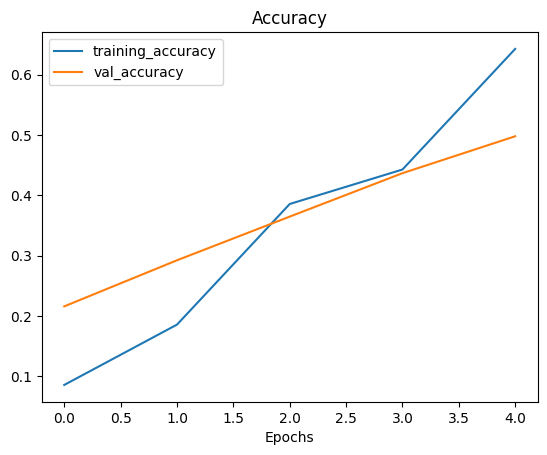

In [29]:
# Plotting the loss curves
plot_loss_curves(history2)

### Model - 2: Feature extraction transfer learning with 10% of the training data






In [30]:
# Getting the data directories
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [31]:
# Set the data inputs
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE,
                                                                            image_size=IMG_SIZE
                                                                            )
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE,
                                                                label_mode="categorical")


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


Now, we have a training dataset, with 75 images of each classes, and an testing set with 250 images of each class

In [32]:
# Create model2 with data augmentation built in
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Building a data augmentation layer
data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2)
], name = "data_augmentation_layer")

In [33]:
# Setup the input shape to our model
input_shape = (224,224,3)

# Create a frozen base model (also called the backbone)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create the inputs and outputs (including the layers in between)
inputs = layers.Input(shape = input_shape, name="input_layer")
x = data_augmentation(inputs)  # Data augmentation does not happen on the test data
x = base_model(x, training=False) # pass augmented images to base model but keep it in inference mode
                                  # this also ensures that the batchnorm-layers do not change

x = layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model2 = tf.keras.Model(inputs, outputs)

# Compiling the model
model2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [34]:
# Creating a ModelCheckpoint callback - this immediately saves our model
# (saves the full model or just the weights) during training. This is useful when we want to use the model for use afterwards
# Set the checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoints.ckpt"

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq = "epoch",  # save every epoch
                                                         verbose=1
                                                         )

In [35]:
# Now, fitting the model with the data and the callback
initial_epochs = 5
history3 = model2.fit(train_data_10_percent,
                      epochs=initial_epochs,
                      validation_data=test_data,
                      validation_steps=int(0.25*len(test_data)),
                      callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                             experiment_name="model2"),
                                 checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/model2/20230711-172759
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9819 - accuracy: 0.3320
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 29s 667ms/step - loss: 1.9819 - accuracy: 0.3320 - val_loss: 1.4167 - val_accuracy: 0.7072
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2887 - accuracy: 0.7160
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 13s 520ms/step - loss: 1.2887 - accuracy: 0.7160 - val_loss: 0.9899 - val_accuracy: 0.7829
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9757 - accuracy: 0.7520
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 12s 494ms/step - loss: 0.9757 - accuracy: 0.7520 - val_loss: 0.7879 - val_accuracy: 0.8092
Epoch 4/5
2

In [36]:
# Evaluating the model
model2.evaluate(test_data)

79/79 [==============================] - 6s 67ms/step - loss: 0.6173 - accuracy: 0.8432


[0.6173099875450134, 0.8432000279426575]

In [37]:
# Comparing the above model with model0, model1
print("Evaluation metrics of model0: ")
model0.evaluate(test_data)

Evaluation metrics of model0: 
79/79 [==============================] - 7s 80ms/step - loss: 0.5517 - accuracy: 0.8584


[0.551724910736084, 0.8583999872207642]

In [38]:
# Comparing the above model with model1
print("Evaluation metrics of model1: ")
model1.evaluate(test_data)

Evaluation metrics of model1: 
79/79 [==============================] - 8s 95ms/step - loss: 1.7462 - accuracy: 0.4980


[1.746229648590088, 0.49799999594688416]

We see that the results from model(model2) trained on augmented data performs with less accuracy as compared to the model(model0)trained on normal data. (Both were trained on 10% data)

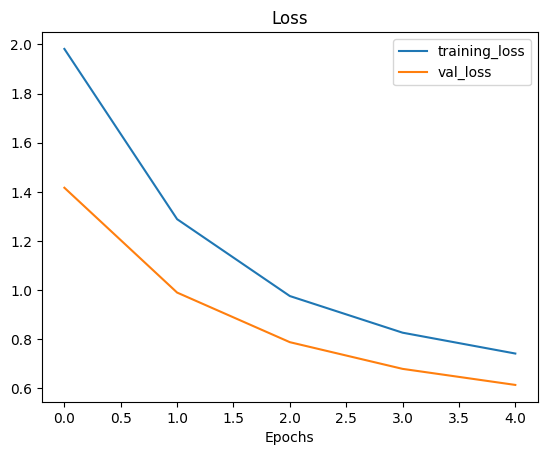

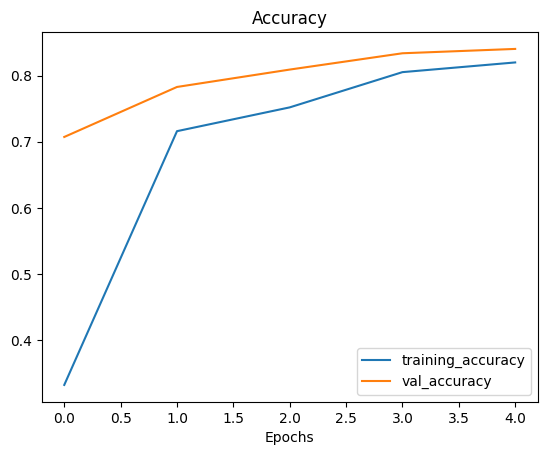

In [39]:
# Plotting the loss curves
plot_loss_curves(history3)

#### Loading in checkpointed weights
Loading in checkpointed weights returns a model to a specific checkpoint

In [40]:
# Load in saved model weights and evaluate model
model2.load_weights(checkpoint_path)

In [41]:
# Evaluate model2 with loaded weights
loaded_weights_model_results = model2.evaluate(test_data)
loaded_weights_model_results

79/79 [==============================] - 6s 67ms/step - loss: 0.6173 - accuracy: 0.8432


[0.6173099875450134, 0.8432000279426575]

In [42]:
# Check to see if loaded model results are very close to out previous non-loaded model
import numpy as np
np.isclose(np.array(loaded_weights_model_results), np.array(model2.evaluate(test_data)))

79/79 [==============================] - 7s 82ms/step - loss: 0.6173 - accuracy: 0.8432


array([ True,  True])

In [43]:
# Checking the difference between the two results
print(np.array(loaded_weights_model_results) - np.array(model2.evaluate(test_data)))

79/79 [==============================] - 6s 68ms/step - loss: 0.6173 - accuracy: 0.8432
[0. 0.]


### Model - 3: Use fine-tuning transfer learning on 10% of the training data with data augmentation

**Note:- ** Fine-tuning usually works best after training a feature extraction model for a few epochs with large amounts of custom data

In [44]:
# Layers in loaded model
model2.layers

In [45]:
# Checking which layers are trainable
for layer in model2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f098d487fd0> True
<keras.engine.sequential.Sequential object at 0x7f098d487430> True
<keras.engine.functional.Functional object at 0x7f098d1146d0> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f098d4878b0> True
<keras.layers.core.dense.Dense object at 0x7f098cee5720> True


In [46]:
# Checking the layers in the base_model (EfficientNetB0) and checking if they are trainable?
for i,layer in enumerate(model2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [47]:
# How many trainable variables are present in base model?
print(len(model2.layers[2].trainable_variables))

0


In [48]:
for layer in base_model.layers[:-10]:
  print(layer.name)

input_3
rescaling_4
normalization_2
rescaling_5
stem_conv_pad
stem_conv
stem_bn
stem_activation
block1a_dwconv
block1a_bn
block1a_activation
block1a_se_squeeze
block1a_se_reshape
block1a_se_reduce
block1a_se_expand
block1a_se_excite
block1a_project_conv
block1a_project_bn
block2a_expand_conv
block2a_expand_bn
block2a_expand_activation
block2a_dwconv_pad
block2a_dwconv
block2a_bn
block2a_activation
block2a_se_squeeze
block2a_se_reshape
block2a_se_reduce
block2a_se_expand
block2a_se_excite
block2a_project_conv
block2a_project_bn
block2b_expand_conv
block2b_expand_bn
block2b_expand_activation
block2b_dwconv
block2b_bn
block2b_activation
block2b_se_squeeze
block2b_se_reshape
block2b_se_reduce
block2b_se_expand
block2b_se_excite
block2b_project_conv
block2b_project_bn
block2b_drop
block2b_add
block3a_expand_conv
block3a_expand_bn
block3a_expand_activation
block3a_dwconv_pad
block3a_dwconv
block3a_bn
block3a_activation
block3a_se_squeeze
block3a_se_reshape
block3a_se_reduce
block3a_se_expand

In [49]:
# To begin fine-tuning, we'll set the last 10 layers of base_model.trainable = True
base_model.trainable = True

# We know that base_model is a part of model2

# Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile (compile model every time, when making a change)
model2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=["accuracy"])

**Note:- ** When using fine-tuning, it is best to lower the learning rate by some amount. A good amount of lowering can be at least 10x

In [50]:
print(len(model2.trainable_variables))

12


In [51]:
# Fine tune for another 5 epochs
# Since we have already trained model2 for 5 epochs before this
# therefore we fine tune these, before fine-tuning other layers
fine_tune_epochs = initial_epochs+5

# Refit the model (same as model2 but with more trainable layers)
history4 = model2.fit(train_data_10_percent,
                      epochs=fine_tune_epochs,
                      validation_data=test_data,
                      validation_steps=int(0.25*len(test_data)),
                      initial_epoch = history3.epoch[-1],  # start training from previous last epoch
                      callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                             experiment_name="fine_tuned_model2")])

Saving TensorBoard log files to: transfer_learning/fine_tuned_model2/20230711-173010
Epoch 5/10
24/24 [==============================] - 27s 616ms/step - loss: 0.6030 - accuracy: 0.8293 - val_loss: 0.4742 - val_accuracy: 0.8635
Epoch 6/10
24/24 [==============================] - 13s 551ms/step - loss: 0.4728 - accuracy: 0.8613 - val_loss: 0.4167 - val_accuracy: 0.8766
Epoch 7/10
24/24 [==============================] - 11s 439ms/step - loss: 0.4173 - accuracy: 0.8840 - val_loss: 0.4450 - val_accuracy: 0.8651
Epoch 8/10
24/24 [==============================] - 10s 372ms/step - loss: 0.3873 - accuracy: 0.8960 - val_loss: 0.4416 - val_accuracy: 0.8618
Epoch 9/10
24/24 [==============================] - 9s 385ms/step - loss: 0.3508 - accuracy: 0.8947 - val_loss: 0.4110 - val_accuracy: 0.8766
Epoch 10/10
24/24 [==============================] - 11s 434ms/step - loss: 0.3296 - accuracy: 0.9000 - val_loss: 0.4069 - val_accuracy: 0.8734


In [52]:
results_fine_tune_model2 = model2.evaluate(test_data)

79/79 [==============================] - 6s 68ms/step - loss: 0.4355 - accuracy: 0.8564


In [53]:
# Checking the evaluation results
results_fine_tune_model2

[0.4354734718799591, 0.8564000129699707]

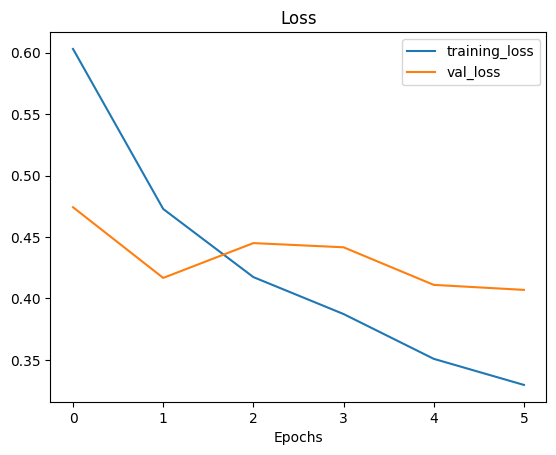

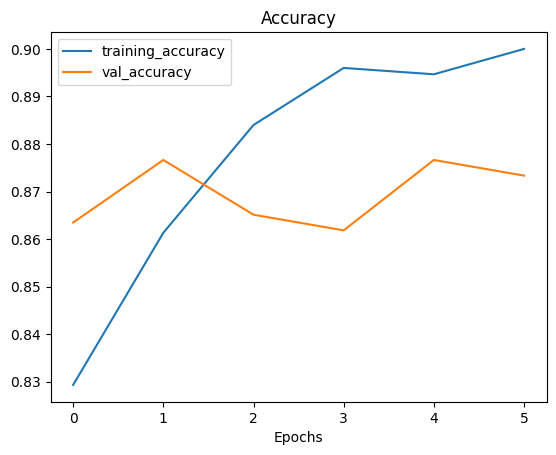

In [54]:
# Check out the loss curves
plot_loss_curves(history4)

Now, making a function to compare one series of running fit() with another (eg. before and after fine-tuning)

In [55]:
# Making the above mentioned function
def compare_history(original_history, new_history, initial_epochs=5):
  """
  Compares two tensorflow history objects
  """
  # Get original history measurements
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  # Combine original history metrics with new history metrics
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Make plots for accuracy
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label="Training accuracy")
  plt.plot(total_val_acc, label="Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine tuning")
  plt.legend(loc="lower right")
  plt.title("Training and validation accuracy")

  # Make plots for loss
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss, label="Training loss")
  plt.plot(total_val_loss, label="Val loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine tuning")
  plt.legend(loc="upper right")
  plt.title("Training and validation loss")


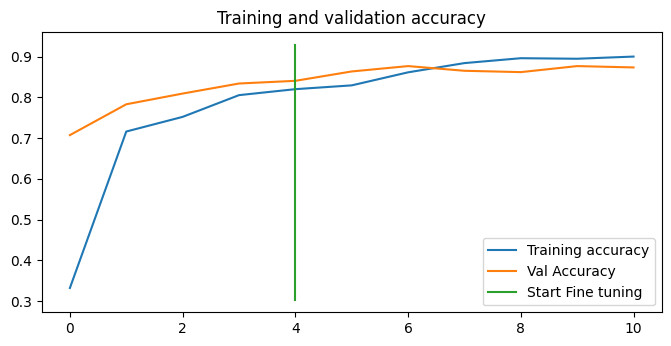

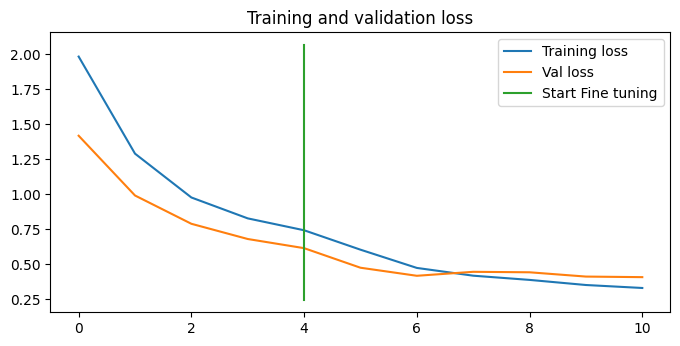

In [56]:
compare_history(history3, history4, initial_epochs=5)

### Fine-tuning and existing model on all of the data

In [57]:
# Download and unzip 10 classes of Food101 data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2023-07-11 17:31:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  21.0MB/s    in 23s     

2023-07-11 17:32:18 (21.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [58]:
# Setup training and test dir
train_dir_all_data = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [59]:
# How many images are we working with now?
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 

In [60]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                                 image_size=IMG_SIZE,
                                                                                 label_mode="categorical",
                                                                                 batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE,
                                                                image_size=IMG_SIZE)


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Model - 4: Use fine-tuning transfer learning on 100% of the training data with data augmentation

To train a fine-tune model (model-4), we need to revert model2 back to its feature extraction weights.

In [ ]:
# Load weights from checkpoints, that way we can fine-tune from
# the same stage the 10 percent data model was fine-tuned from
model2.load_weights(checkpoint_path)

In [62]:
model2.evaluate(test_data)

79/79 [==============================] - 9s 102ms/step - loss: 0.6173 - accuracy: 0.8432


[0.6173099875450134, 0.8432000279426575]

In [63]:
for layer_number, layer in enumerate(model2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation_layer True
2 efficientnetb0 True
3 global_average_pooling_2D True
4 output_layer True


In [67]:
# Checking the base model and seeing which layers are trainable
for layer_number, layer in enumerate(model2.layers[2].layers):
  print(layer_number,layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [69]:
# Compile the model
model2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=["accuracy"])


In [70]:
# Continue to train and fine-tune the model to the data (100% of training data)
fine_tune_epochs = initial_epochs + 5

history_10_class_full = model2.fit(train_data_10_classes_full,
                                   epochs=fine_tune_epochs,
                                   validation_data=test_data,
                                   validation_steps=int(0.25*len(test_data)),
                                   initial_epoch = history3.epoch[-1],  # start training from previous last epoch
                                   callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                          experiment_name="fine_tuned_model3")])

Saving TensorBoard log files to: transfer_learning/fine_tuned_model3/20230711-174404
Epoch 5/10
235/235 [==============================] - 78s 287ms/step - loss: 0.6465 - accuracy: 0.7931 - val_loss: 0.3725 - val_accuracy: 0.8849
Epoch 6/10
235/235 [==============================] - 60s 255ms/step - loss: 0.5219 - accuracy: 0.8293 - val_loss: 0.3351 - val_accuracy: 0.8964
Epoch 7/10
235/235 [==============================] - 52s 222ms/step - loss: 0.4629 - accuracy: 0.8515 - val_loss: 0.2826 - val_accuracy: 0.9128
Epoch 8/10
235/235 [==============================] - 50s 212ms/step - loss: 0.4218 - accuracy: 0.8632 - val_loss: 0.2932 - val_accuracy: 0.9046
Epoch 9/10
235/235 [==============================] - 45s 190ms/step - loss: 0.3954 - accuracy: 0.8693 - val_loss: 0.3009 - val_accuracy: 0.9062
Epoch 10/10
235/235 [==============================] - 42s 179ms/step - loss: 0.3676 - accuracy: 0.8809 - val_loss: 0.2895 - val_accuracy: 0.9046


In [71]:
# Evaluating on the test data
results_fine_tune_full_data = model2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 8s 83ms/step - loss: 0.2894 - accuracy: 0.9072


[0.2894003093242645, 0.9071999788284302]

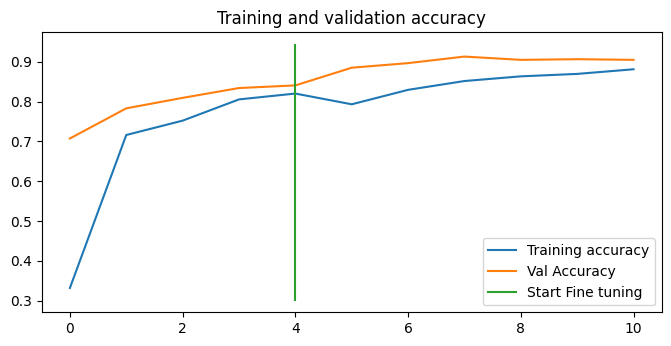

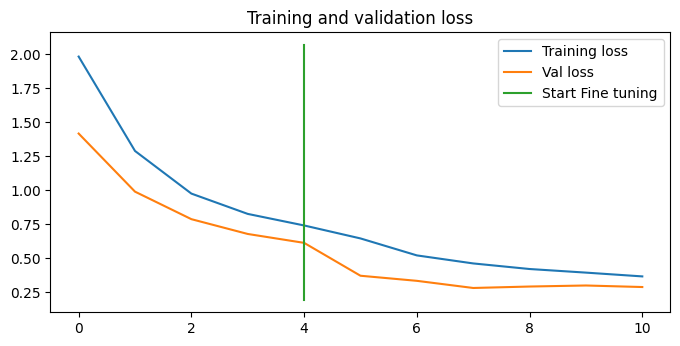

In [73]:
# Compare the fine-tuned model's histories
compare_history(original_history=history3,
               new_history=history_10_class_full,
               initial_epochs=5)

### Viewing the experiments data on TensorBoard

In [80]:
# View tensorboard logs of transfer learning modelling experiments
# upload TensorBoard dev records
!tensorboard dev upload --logdir ./transfer_learning \
   --name "Transfer Learning Fine-tuning experiments on Food101 Class" \
   --description "A series of experiments on transfer learning with varying amounts of data and fine-tuning"\
   --one_shot # Exits the upload

2023-07-11 18:03:19.473276: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   RNHG-KPLY



New experiment created. View your TensorBoard at: https://tensorboard.dev/ex

In [81]:
# Checking out the TensorBoard experiment
!tensorboard dev list

2023-07-11 18:05:54.747049: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://tensorboard.dev/experiment/ryPaKzvGQY2Pn1V2SbkWUA/
	Name                 Transfer Learning Fine-tuning experiments on Food101 Class
	Description          A series of experiments on transfer learning with varying amounts of data and fine-tuning
	Id                   ryPaKzvGQY2Pn1V2SbkWUA
	Created              2023-07-11 18:04:05 (1 minute ago)
	Updated              2023-07-11 18:04:12 (1 minute ago)
	Runs                 10
	Tags                 5
	Scalars              162
	Tensor bytes         0
	Binary object bytes  4592570
https://tensorboard.dev/experiment/ajmTmNcDQAWogqGaQhd3aA/
	Name                 EfficientNetB0 Vs ResNet50V2
	Description          Comparing two different pre-trained models for Food 101 dataset
	Id                   ajmTmNcDQAWogqGaQhd3aA
	Created              2023-07-10 14:58:53
	Updated              2023-07-10 14:58:55
	Runs      

In [82]:
# To delete an experiment
# !tensorboard dev delete --experiment_id <id>